# Goal Definition

# Importing Essential Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import auc
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.losses import binary_crossentropy
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.layers import Activation
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
##
import keras
from sklearn.model_selection import GridSearchCV
!pip install scikeras
import tensorflow as tf
import numpy as np
import keras
from scikeras.wrappers import KerasClassifier
##
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



# Loading Dataset

In [79]:
# Loading dataset

#from google.colab import drive
#drive.mount("/content/drive")

Dataset before encoding will be assigned the variable (df_be)

In [80]:
#  Reading Dataset and displaying first 5 rows
df_be = pd.read_csv('/content/sample_data/healthcare-dataset-stroke-data.csv')
df_be.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing

Dropping the unnecessary columns i.e Patient ID

In [81]:
df_be.drop(['id'], axis=1, inplace=True)

In [82]:
gender_counts = df_be['gender'].value_counts()
total_entries = len(df_be)
gender_percentages = (gender_counts / total_entries) * 100

print("Gender Percentages:")
print(gender_percentages)

Gender Percentages:
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: count, dtype: float64


In [83]:
gender_counts

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [84]:
df_be[df_be['gender']== 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


We can see that the there is only one case of gender identified as (other), and it is  not labeled as stroke, in this case this instance is insignificant and best to be dropped to avoid having a designated category only for (other) when perfoming encoding

In [85]:
df_be.drop(df_be[df_be['gender']== 'Other'].index,inplace= True)
df_be.shape

(5109, 11)

In [86]:
df_be.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Exploring missing values

In [87]:
df_be.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [88]:
ratio_of_missing_data =(df_be["bmi"].isnull().sum() / df_be.shape[0]) * 100
print("Ratio of Missing Data",(ratio_of_missing_data),'%')


Ratio of Missing Data 3.9342337052260716 %


Missing bmi values represent almost 4% of the dataset, so based on the data size 5000+, we will not drop missing values in the bmi column

## Dealing with Missing Data, using Median

In [89]:
# # drop the missing values
# df_be.dropna(subset=['bmi'], inplace=True)

In [90]:
median_bmi =df_be['bmi'].median()
df_be['bmi'].fillna(median_bmi, inplace =True)

Checking data frame to confirm abscence of null data

In [91]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Dicovering data counts and distributions

In [92]:
df_be['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

The distribution analysis of the two classes above indicate that this dataset is imbalanced as only 249 cases out of 5000+ samples are labelled as stroke. Therefore, we will need to apply techniques to balance the dataset prior to model development.

In [93]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_features = [ 'age', 'avg_glucose_level', 'bmi']

## Exploratory Data Analysis

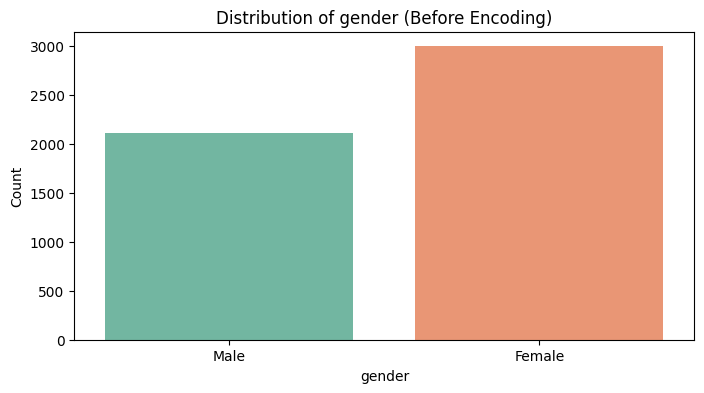

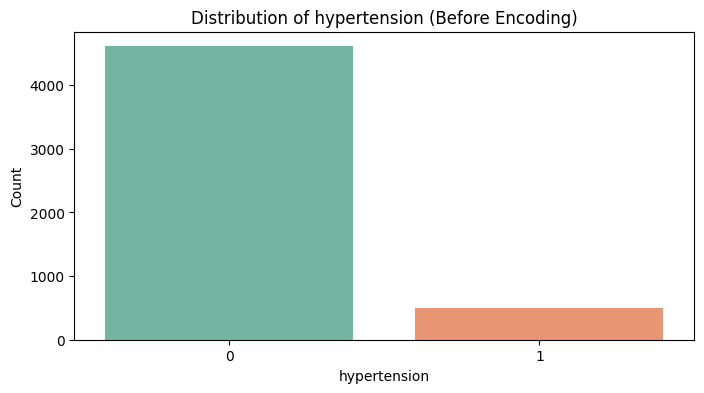

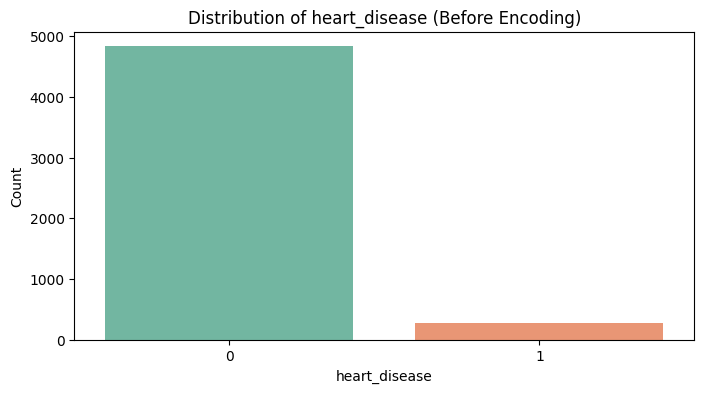

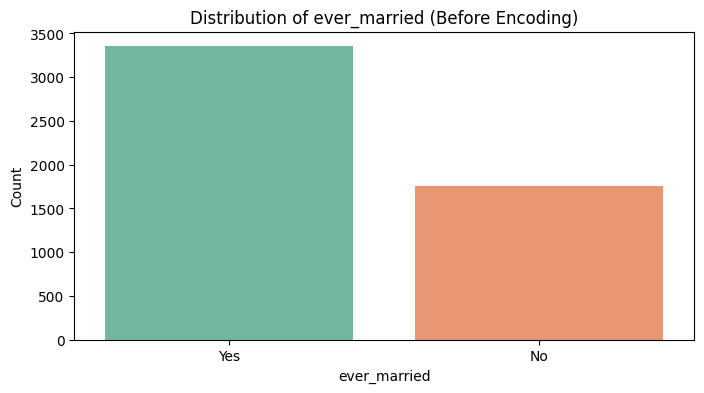

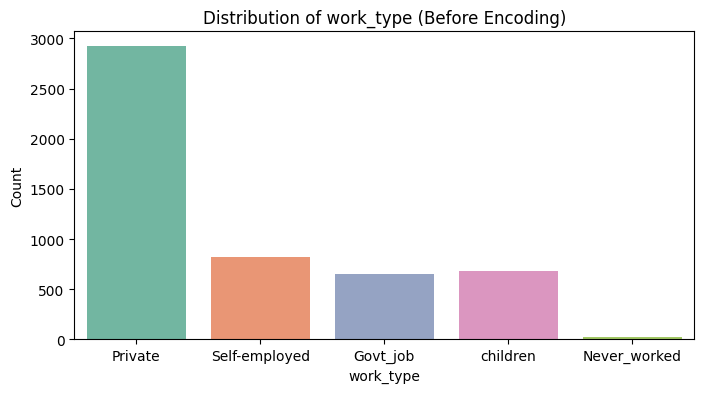

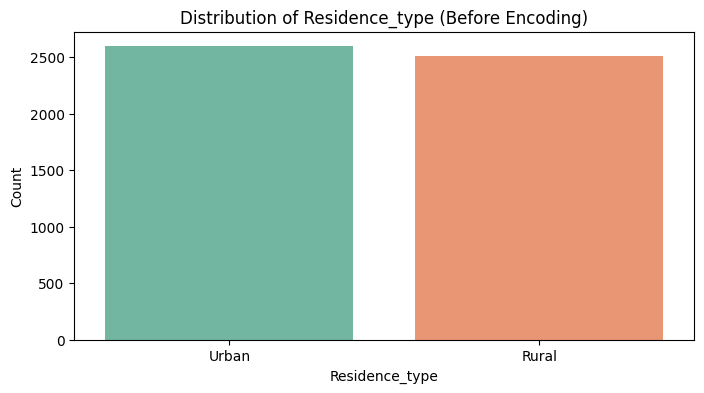

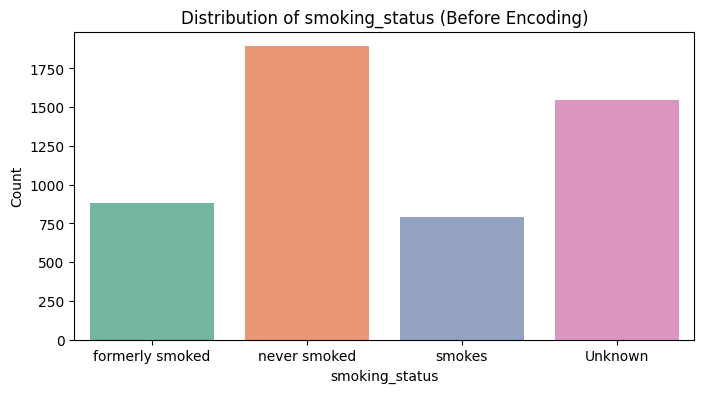

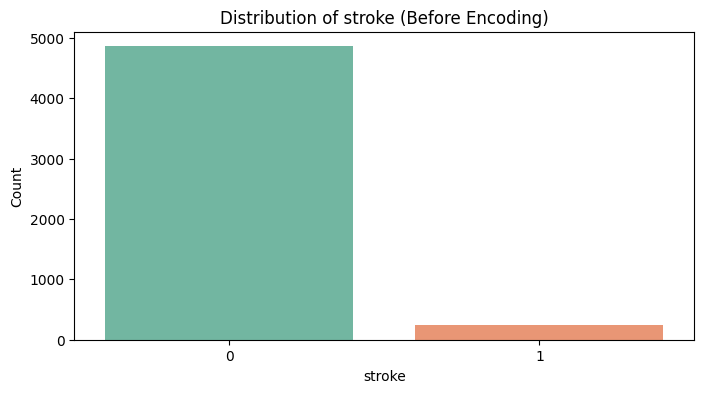

In [94]:
for feature in categorical_features:
   plt.figure(figsize=(8, 4))
   sns.countplot(data=df_be, x=feature, palette='Set2')
   plt.title(f'Distribution of {feature} (Before Encoding)')
   plt.xlabel(feature)
   plt.ylabel('Count')

   plt.show()

Distribution of categorical features using pie chart and percentage of occurrences

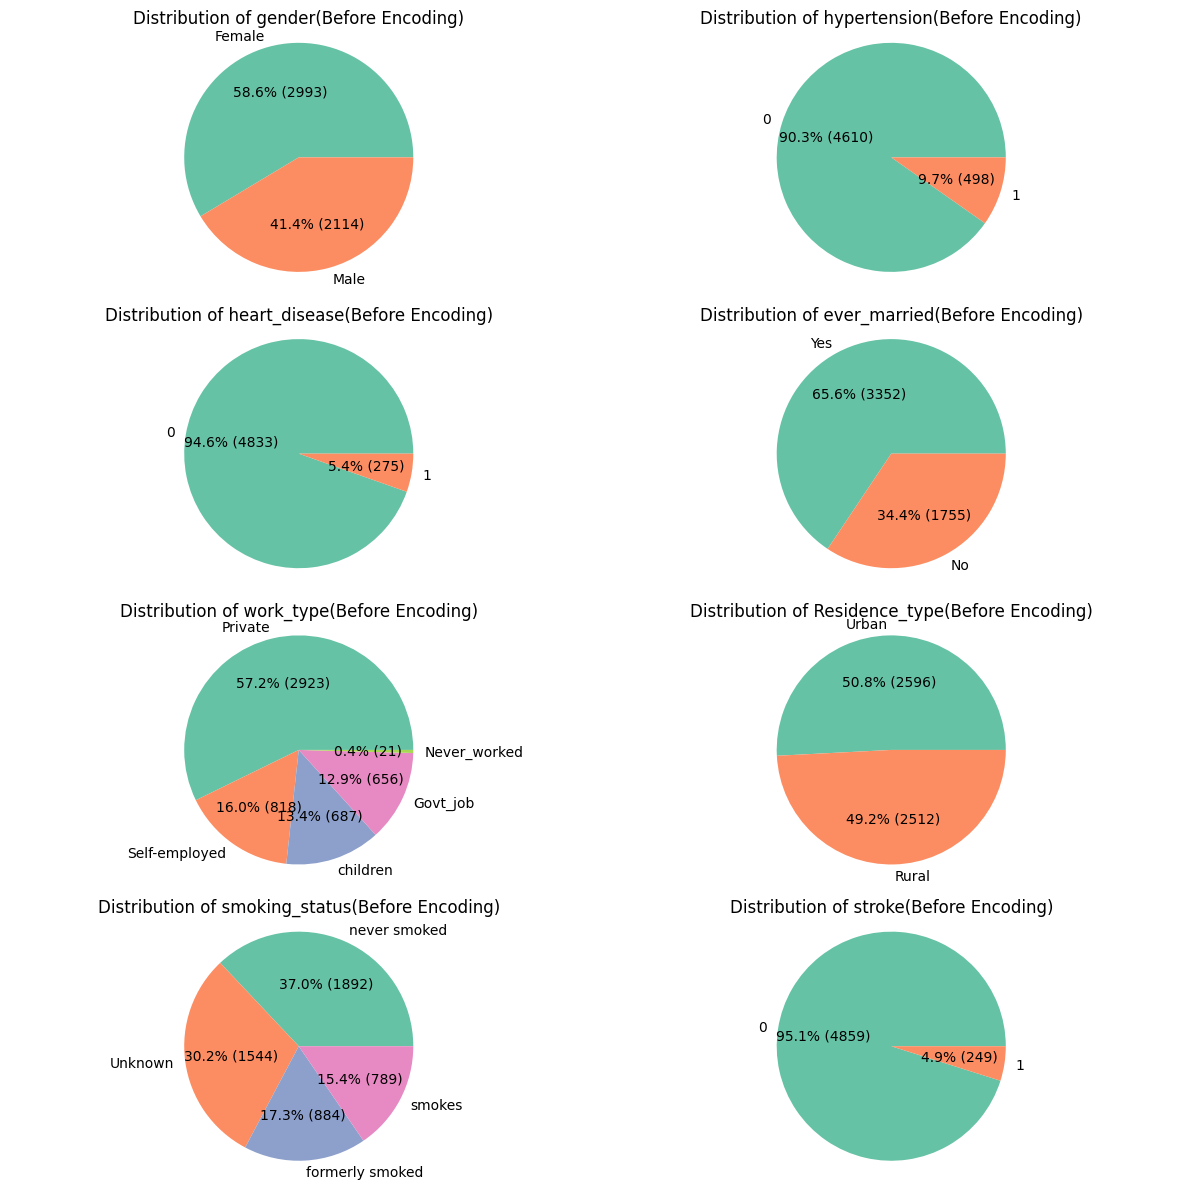

In [95]:
num_rows = 4
num_cols = 2
total_plots = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for idx, feature in enumerate(categorical_features[:total_plots]):
    row = idx // num_cols
    col = idx % num_cols

    category_counts = df_be[feature].value_counts()

    axes[row, col].pie(category_counts, labels=category_counts.index, autopct=lambda pct: f"{pct:.1f}% ({int(pct * sum(category_counts)/100)})",colors=sns.color_palette('Set2', len(category_counts)))
    axes[row, col].set_title(f'Distribution of {feature}(Before Encoding)')
    axes[row, col].axis('equal')

plt.tight_layout()
plt.show()


Distribution of features - numerical features

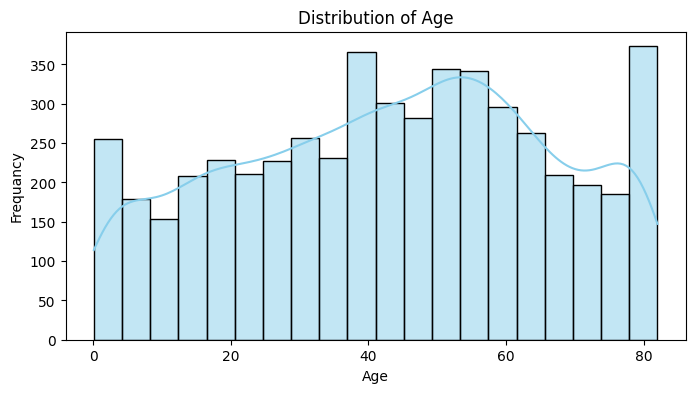

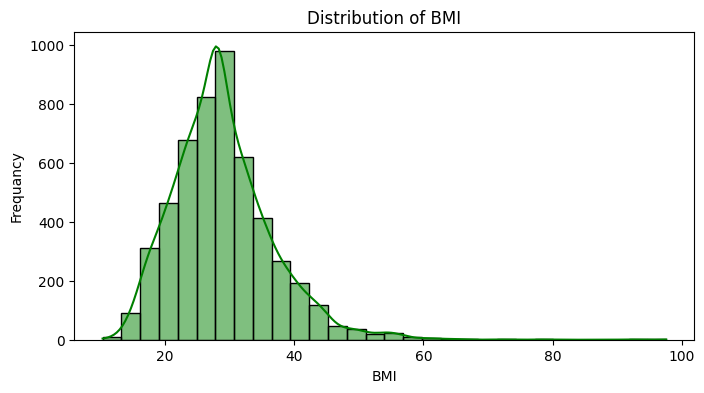

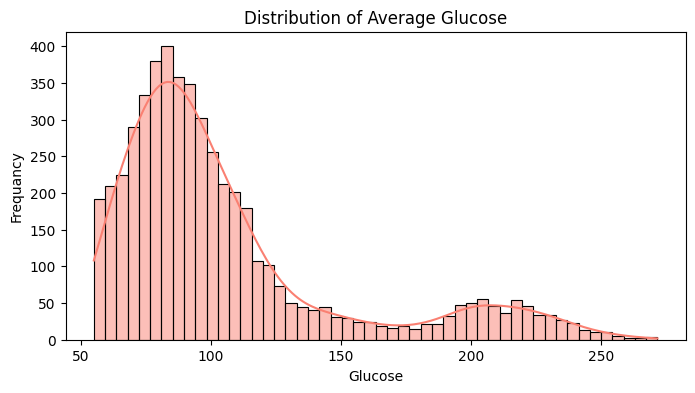

In [96]:
plt.figure(figsize=(8,4))
sns.histplot(df_be['age'],bins=20, kde= True, color='skyblue' )
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['bmi'],bins=30, kde= True, color='green' )
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['avg_glucose_level'],bins=50, kde= True, color='salmon' )
plt.title('Distribution of Average Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequancy')
plt.show()

Distribution of numerical features by output 'stroke'

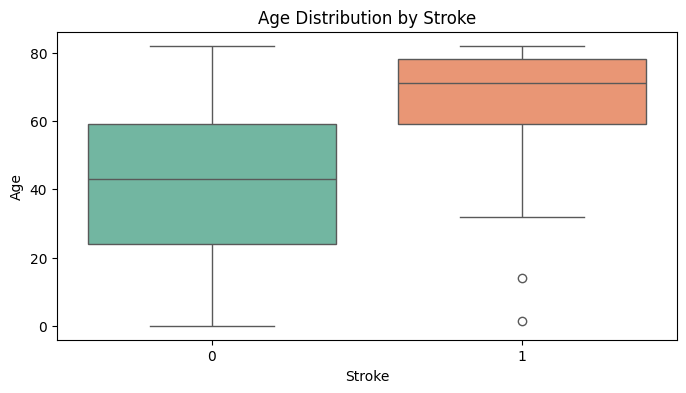

In [97]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='age', palette='Set2')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

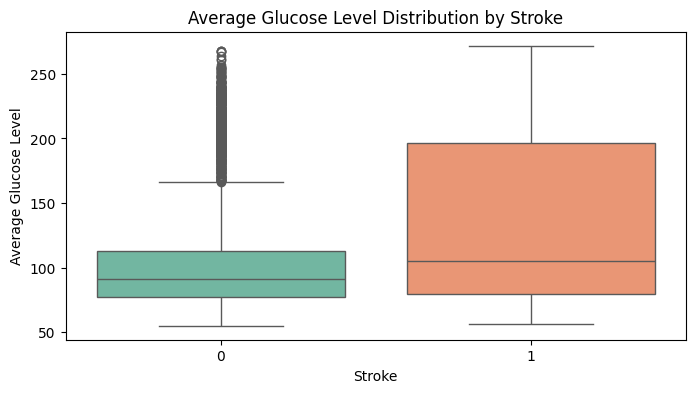

In [98]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

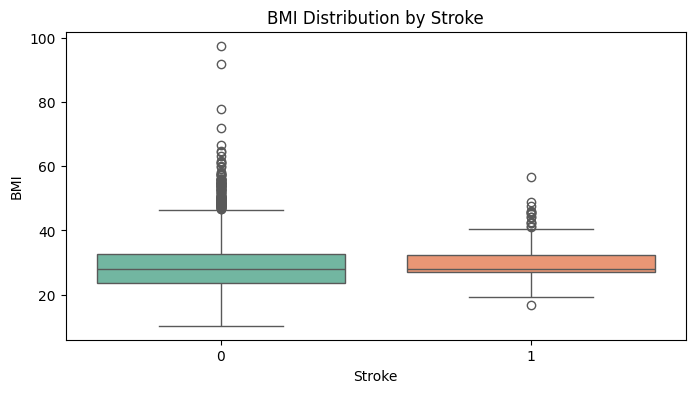

In [99]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

Based on the above, we can notice that individuals who are older with higher glucose level were more likely to have a stroke. Also, we notice that bmi index might not be significant indicator for probability of getting a stroke

In [100]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Encoding of dataset

  Enconding of Categorical features : Based on data type, we will use OneHotEncoder to avoid ordinalty assumptions. However, first column of each encoded feature will be dropped to reduce multicollinearity and reduce number of features

In [101]:
# categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# categorical_data = df_be[categorical_variables]
# encoder = OneHotEncoder(sparse_output = False, drop ='first')
# encoded_data = encoder.fit_transform(categorical_data)
# encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
# df = pd.concat([df_be.drop(columns=categorical_variables), encoded_dataframe], axis=1)
# df.head(5)

In [102]:
#df = pd.get_dummies(df_be, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True, dtype=int)
label_encoder = LabelEncoder()
df_be['gender'] = label_encoder.fit_transform(df_be['gender'])
df_be['ever_married'] = label_encoder.fit_transform(df_be['ever_married'])
df_be['work_type'] = label_encoder.fit_transform(df_be['work_type'])
df_be['Residence_type'] = label_encoder.fit_transform(df_be['Residence_type'])
df_be['smoking_status'] = label_encoder.fit_transform(df_be['smoking_status'])
df = df_be

In [103]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [104]:
df.shape

(5109, 11)

In [105]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [106]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [107]:
df['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

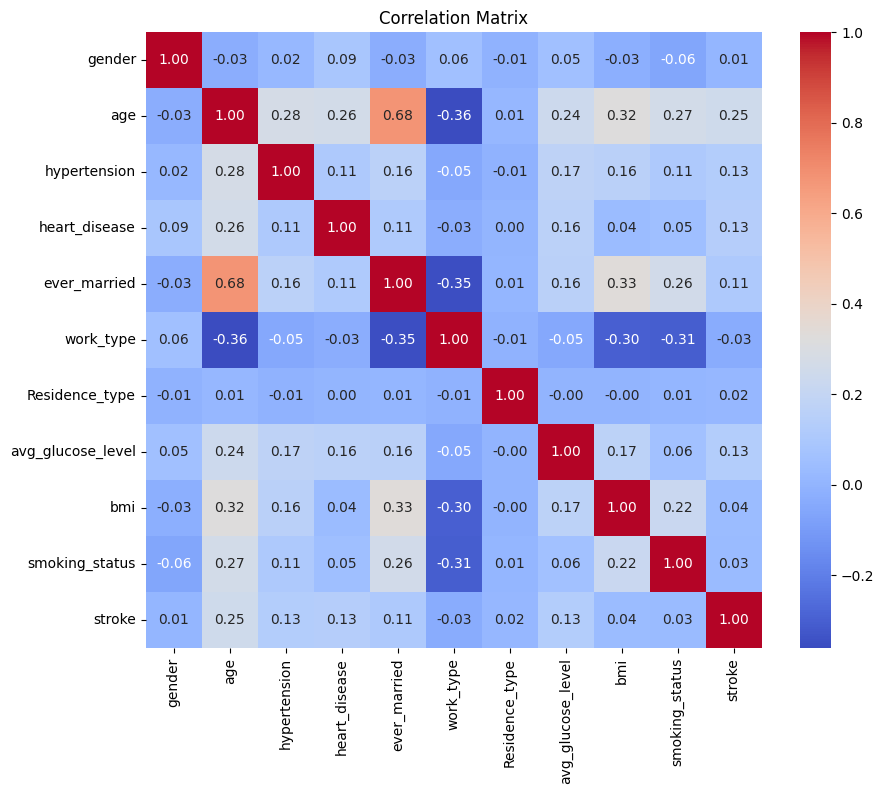

In [108]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

* Maybe we should consider dropping (work_type_children) as its highly correlated with age, ever_married ?? Conifrm with team

Features Relatioship with the output stroke

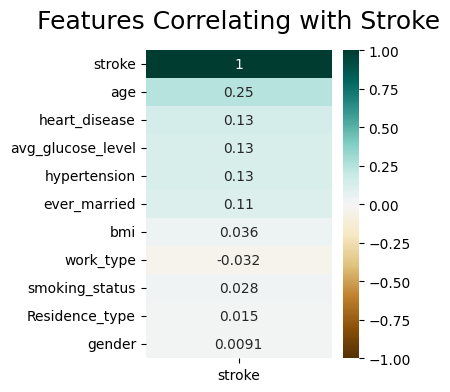

In [109]:
plt.figure(figsize=(3, 4))
heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', key=abs, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':18}, pad=16);

Based on the above understanding of the features we notice that : age, heart disease, average glucose level, hypertension ,and marriage status are the mostly influenced features with stroke. However, smoking status, gender are the least correlated to stroke.

Based on the correlation matrix, we determined that the 'work_type_children' column can be dropped as it is highly correlated with other independent variables (i.e., age, ever_married_Yes). In addition, further analysis showed that it is not strongly correlated with the output variable, 'stroke'. Therefore, dropping this column may reduce some of the multicollinearity and will not have an affect on accurately predicting the target variable.  

In [110]:
#df.drop(['work_type_children'], axis=1, inplace=True)

In [111]:
df.shape

(5109, 11)

## Outlier Detection

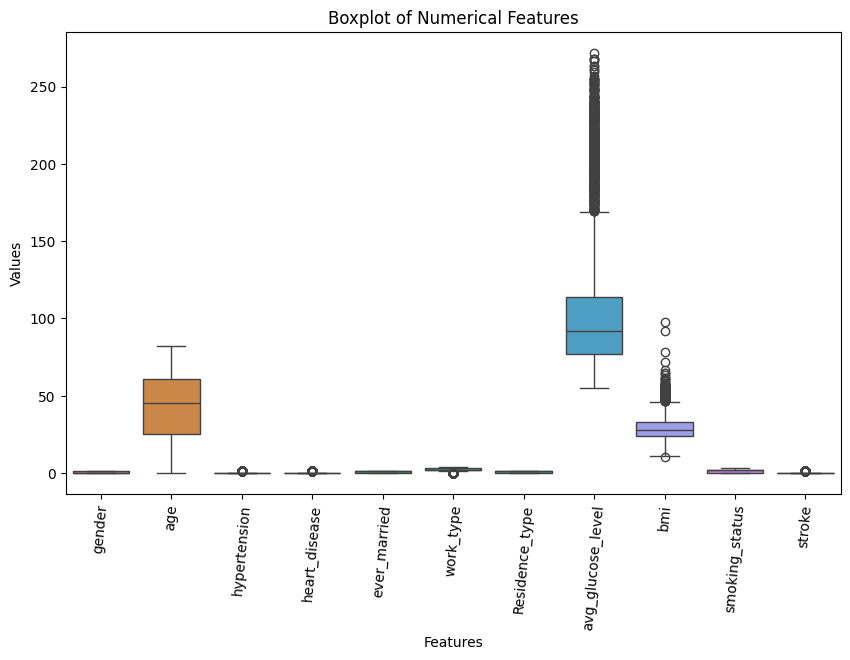

In [112]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

## Handling Skewness

In [113]:
df.skew().sort_values(ascending=False)

stroke               4.192807
heart_disease        3.946786
hypertension         2.715026
avg_glucose_level    1.572815
bmi                  1.087929
gender               0.349410
Residence_type      -0.032506
smoking_status      -0.039430
age                 -0.137430
work_type           -0.308679
ever_married        -0.658345
dtype: float64

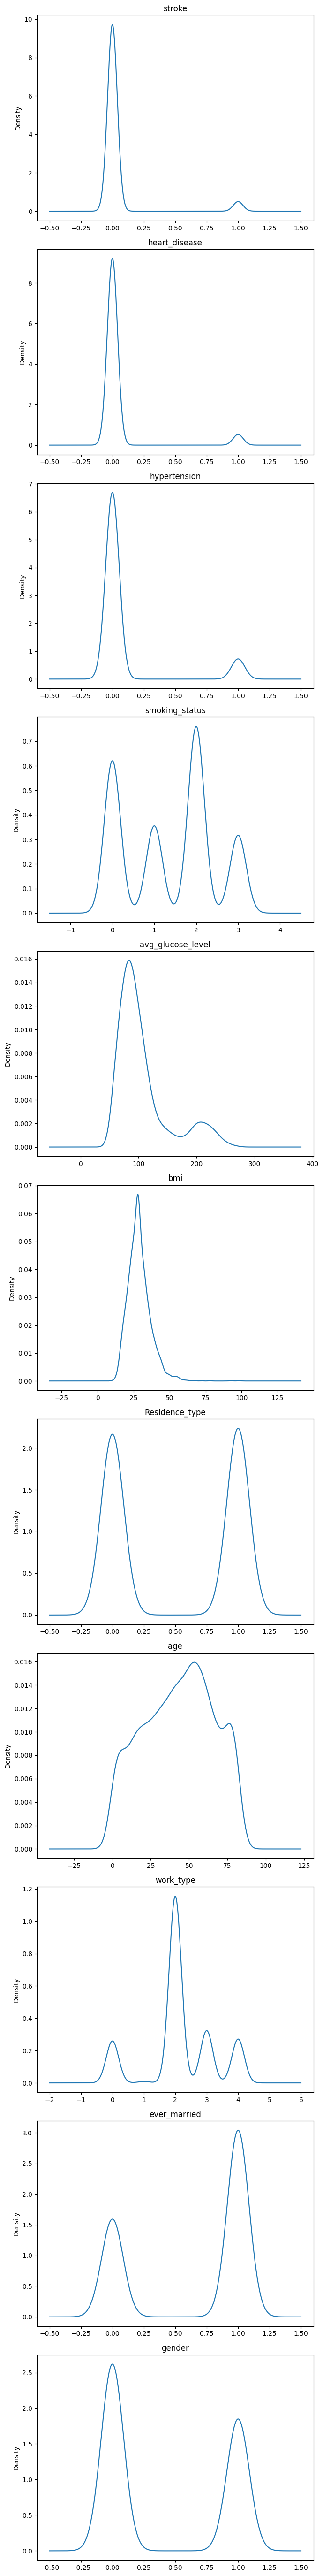

In [114]:
# Visualizing skewness for each attribute in the dataset
# List of parameters for density plot
parameters = ['stroke', 'heart_disease', 'hypertension', 'smoking_status',
              'avg_glucose_level', 'bmi', 'Residence_type', 'age', 'work_type', 'ever_married', 'gender']

# Create subplots
fig, axes = plt.subplots(len(parameters), 1, figsize=(7, 5 * len(parameters)))

# Loop through parameters and plot density plots
for i, param in enumerate(parameters):
    df[param].plot(kind='density', ax=axes[i])
    axes[i].set_title(param)

plt.tight_layout()
plt.show()

In [115]:
# List of attributes to analyze
attributes = ['stroke', 'heart_disease', 'hypertension', 'smoking_status',
              'avg_glucose_level', 'bmi', 'Residence_type', 'age', 'work_type', 'ever_married', 'gender']
# Dictionary to store skewness before and after transformations
skewness_results = {}

for attribute in attributes:
    try:
        # Display skewness before transformation
        attribute_skewness = df[attribute].skew()
        print(f"\nSkewness of '{attribute}': {attribute_skewness}")

        # Apply log transformation
        log_attribute = np.log1p(df[attribute])
        log_skewness = log_attribute.skew()
        print(f"Skewness after Log Transformation: {log_skewness}")

        # Apply sqrt transformation
        sqrt_attribute = df[attribute]**(1/2)
        sqrt_skewness = sqrt_attribute.skew()
        print(f"Skewness after Square Root Transformation: {sqrt_skewness}")

        # Apply reciprocal transformation
        reciprocal_attribute = 1 / df[attribute]
        reciprocal_skewness = reciprocal_attribute.skew()
        print(f"Skewness after Reciprocal Transformation: {reciprocal_skewness}")

        # Apply Box-Cox transformation
        bcx_attribute, _ = boxcox(df[attribute])
        bcx_skewness = pd.Series(bcx_attribute).skew()
        print(f"Skewness after Box-Cox Transformation: {bcx_skewness}")

        # Apply Yeo-Johnson transformation
        yf_attribute, _ = yeojohnson(df[attribute])
        yf_skewness = pd.Series(yf_attribute).skew()
        print(f"Skewness after Yeo-Johnson Transformation: {yf_skewness}")

        # Store skewness results in dictionary
        skewness_results[attribute] = {
            'Original': attribute_skewness,
            'Log': log_skewness,
            'Square Root': sqrt_skewness,
            'Reciprocal': reciprocal_skewness,
            'Box-Cox': bcx_skewness,
            'Yeo-Johnson': yf_skewness
        }
    except Exception as e:
        print(f"Error occurred while processing '{attribute}': {e}")


Skewness of 'stroke': 4.1928068074994735
Skewness after Log Transformation: 4.192806807499474
Skewness after Square Root Transformation: 4.1928068074994735
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'stroke': Data must be positive.

Skewness of 'heart_disease': 3.9467864430646906
Skewness after Log Transformation: 3.9467864430646906
Skewness after Square Root Transformation: 3.9467864430646906
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'heart_disease': Data must be positive.

Skewness of 'hypertension': 2.715026136949753
Skewness after Log Transformation: 2.7150261369497537
Skewness after Square Root Transformation: 2.715026136949753
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'hypertension': Data must be positive.

Skewness of 'smoking_status': -0.039430110478049576
Skewness after Log Transformation: -0.43973976572512113
Skewness after Square Root Transformation: -0.559458729670352

In [116]:
# ## Applying skewness from calculated
df['avg_glucose_level'], lambda_bc = boxcox(df['avg_glucose_level'])
df['bmi'], lambda_yj = yeojohnson(df['bmi'])

# df['avg_glucose_level'] = np.reciprocal(df['avg_glucose_level'])
# df['bmi'] = np.log(df['bmi'])

In [117]:
df.skew().sort_values(ascending=False)

stroke               4.192807
heart_disease        3.946786
hypertension         2.715026
gender               0.349410
avg_glucose_level    0.083304
bmi                 -0.001035
Residence_type      -0.032506
smoking_status      -0.039430
age                 -0.137430
work_type           -0.308679
ever_married        -0.658345
dtype: float64

## Label Selection

In [118]:
y = df['stroke']
dropcols = ['stroke','Residence_type']
x= df.drop(columns=dropcols)

In [119]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,0.942715,3.411118,1,1
1,0,61.0,0,0,1,3,0,0.942294,3.183747,2,1
2,1,80.0,0,1,1,2,0,0.938910,3.308924,2,1
3,0,49.0,0,0,1,2,1,0.941631,3.357803,3,1
4,0,79.0,1,0,1,3,0,0.941703,3.048064,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,0.936984,3.183747,2,0
5106,0,81.0,0,0,1,3,1,0.940017,3.487476,2,0
5107,0,35.0,0,0,1,3,0,0.936899,3.257090,2,0
5108,1,51.0,0,0,1,2,0,0.941502,3.103575,1,0


## Data Splitting

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Handling Imbalance in target variable

In [121]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
802,1,79.00,0,0,1,3,0.939340,3.195910,1
3927,0,62.00,0,0,1,2,0.937462,3.404041,0
2337,0,21.00,0,0,0,2,0.933174,3.340118,2
3910,1,31.00,0,0,1,0,0.934421,3.251447,1
1886,0,31.00,0,0,0,2,0.933199,2.887113,2
...,...,...,...,...,...,...,...,...,...
4427,0,61.00,0,0,1,2,0.940810,3.234293,2
466,0,61.00,1,0,1,2,0.941601,3.837880,3
3092,0,1.16,0,0,0,4,0.938266,2.791501,0
3773,0,38.00,0,0,1,0,0.937984,2.953514,2


In [122]:
train_df = pd.concat([x_train, y_train], axis=1)

In [123]:
train_df.to_excel('train_dataset.xlsx', index=False)

In [124]:
pip install imbalanced-learn

In [125]:
y_train.value_counts()

stroke
0    3900
1     187
Name: count, dtype: int64

In [126]:
smote = SMOTE(sampling_strategy=0.9,random_state=42)

In [127]:
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [128]:
y_train_resampled.value_counts()

stroke
0    3900
1    3510
Name: count, dtype: int64

In [129]:
x_resampled_df = pd.DataFrame(x_train_resampled, columns=x.columns)
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['stroke'])

In [130]:
balanced_train_df = pd.concat([x_resampled_df, y_resampled_df], axis=1)

In [131]:
balanced_train_df.to_excel('balanced_dataset.xlsx', index=False)

In [132]:
balanced_train_df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,79.000000,0,0,1,3,0.939340,3.195910,1,0
1,0,62.000000,0,0,1,2,0.937462,3.404041,0,0
2,0,21.000000,0,0,0,2,0.933174,3.340118,2,0
3,1,31.000000,0,0,1,0,0.934421,3.251447,1,0
4,0,31.000000,0,0,0,2,0.933199,2.887113,2,0
...,...,...,...,...,...,...,...,...,...,...
7405,1,74.373000,0,0,1,2,0.938539,3.133479,0,1
7406,0,70.000000,0,0,1,2,0.942672,3.627297,1,1
7407,0,79.304205,0,0,1,1,0.939227,3.091827,0,1
7408,0,77.000000,0,0,1,3,0.937835,3.296476,1,1


## Data Splitting after SMOTE

In [133]:
y_train = balanced_train_df['stroke']
x_train = balanced_train_df.drop(['stroke'], axis=1)

In [134]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
7405    1
7406    1
7407    1
7408    1
7409    1
Name: stroke, Length: 7410, dtype: int64

## Normalization

In [135]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [136]:
scaled_x_train

array([[ 1.3875824 ,  1.11142241, -0.31451136, ...,  0.34803066,
        -0.03023155, -0.3308381 ],
       [-0.72067792,  0.35188719, -0.31451136, ..., -0.37641382,
         1.0634186 , -1.31696454],
       [-0.72067792, -1.47993307, -0.31451136, ..., -2.03071979,
         0.72752788,  0.65528834],
       ...,
       [-0.72067792,  1.12501385, -0.31451136, ...,  0.30444803,
        -0.57714597, -1.31696454],
       [-0.72067792,  1.02206533, -0.31451136, ..., -0.23244082,
         0.49820635, -0.3308381 ],
       [-0.72067792, -0.40764804, -0.31451136, ..., -1.65555586,
         0.11089897, -0.3308381 ]])

In [137]:
scaled_x_train.shape

(7410, 9)

In [138]:
y_train.shape

(7410,)

## Principle Component Analysis

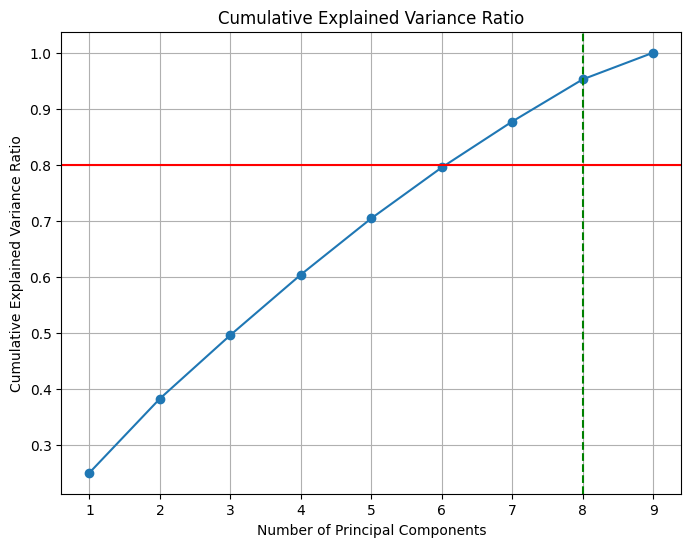

In [139]:
pca = PCA ()
pca.fit(scaled_x_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.arange(1, len(explained_variance_ratio) + 1)
index_80_percent = np.argmax(cumulative_variance_ratio >= 0.9) + 1

plt.figure(figsize=(8, 6))
plt.plot(n_components, cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.axvline(x=index_80_percent, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.xticks(n_components)
plt.show()

In [140]:
# pca = PCA(n_components=11)
# X_train_pca = pca.fit_transform(scaled_x_train)
# X_val_pca = pca.fit_transform(scaled_x_val)
# X_test_pca = pca.transform(scaled_x_test)

# Model Training

## Support Vector Machine

In [141]:
svc = SVC(kernel='linear')
svc.fit(scaled_x_train, y_train)
predicted_output = svc.predict(scaled_x_test)
accuracy = metrics.accuracy_score(y_test, predicted_output)
accuracy = metrics.accuracy_score(y_test, predicted_output) * 100
print("Accuracy:", accuracy,"%")


Accuracy: 76.4187866927593 %


[[741 219]
 [ 22  40]]


Text(0.5, 1.0, 'SVM Confusion Matrix')

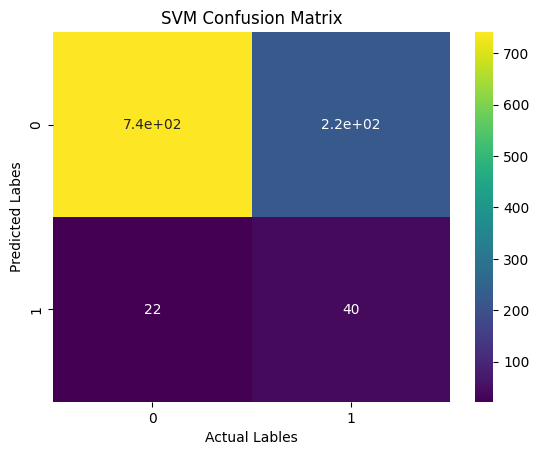

In [142]:
cmatrix = confusion_matrix(y_test,predicted_output)
print(cmatrix)
sns.heatmap(confusion_matrix(y_test,predicted_output),cmap='viridis',annot=True)
plt.xlabel("Actual Lables")
plt.ylabel("Predicted Labes")
plt.title("SVM Confusion Matrix")

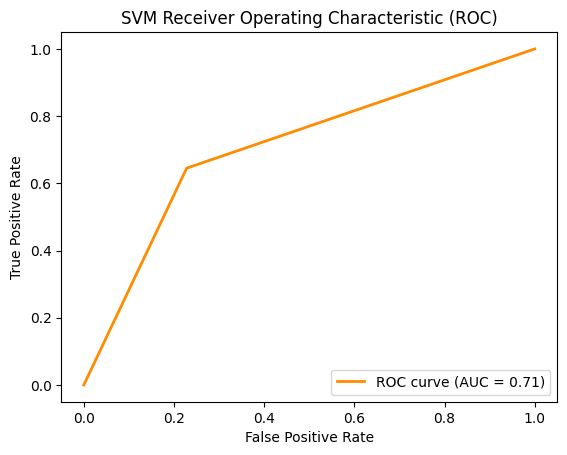

AUC value is: 0.7085181451612903


In [143]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_output)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

## Logistic Regression

Accuracy: 78.08%
Confusion Matrix:
 [[757 203]
 [ 21  41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       960
           1       0.17      0.66      0.27        62

    accuracy                           0.78      1022
   macro avg       0.57      0.72      0.57      1022
weighted avg       0.92      0.78      0.83      1022



Text(0.5, 1.0, 'Logistics Confusion Matrix')

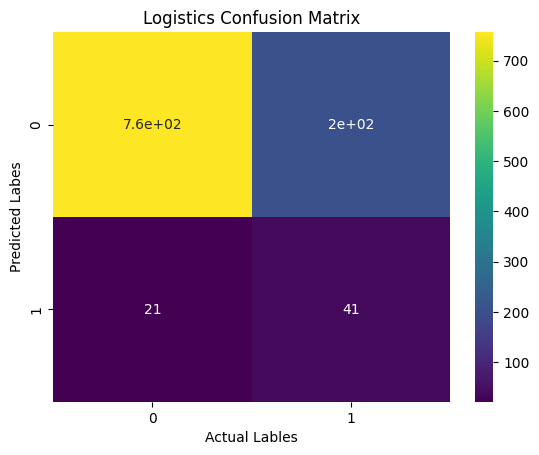

In [144]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
# logreg.fit(X_train_pca, y_train)
logreg.fit(scaled_x_train, y_train_resampled)

# y_pred = logreg.predict(X_test_pca)
y_pred = logreg.predict(scaled_x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# print(cnf_matrix)

# metrics_report = metrics.classification_report(y_test, y_pred)
# print(metrics_report)

# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

modelPred = y_pred
sns.heatmap(confusion_matrix(y_test,modelPred),cmap='viridis',annot=True);
plt.xlabel("Actual Lables")
plt.ylabel("Predicted Labes")
plt.title("Logistics Confusion Matrix")

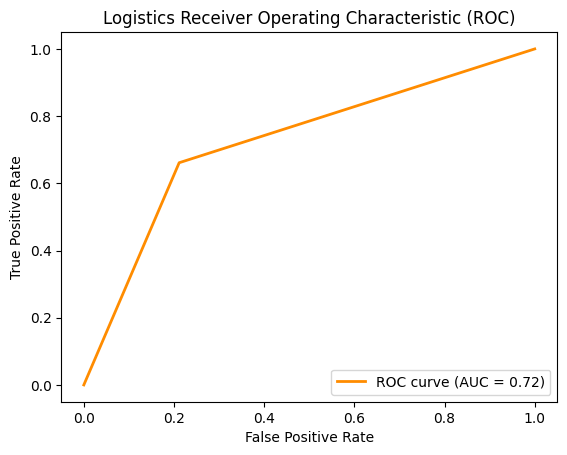

AUC value is: 0.7249159946236559


In [145]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistics Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

## Random Forest

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.15      0.74      0.25        62

    accuracy                           0.74      1022
   macro avg       0.57      0.74      0.55      1022
weighted avg       0.93      0.74      0.80      1022

Accuracy Score:  0.735812133072407


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

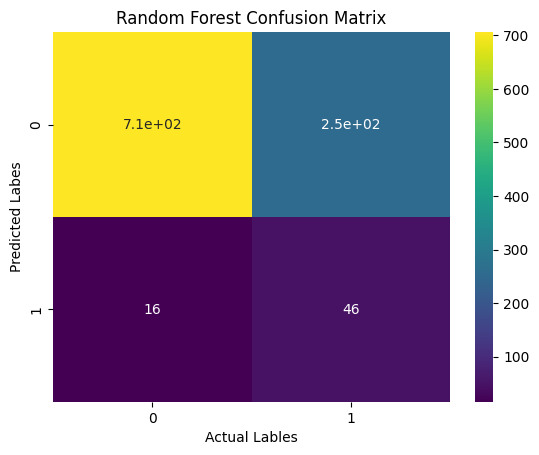

In [146]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=3,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
modelPred = rfc_tuned_pred
print(metrics.classification_report(y_test,modelPred))
print('Accuracy Score: ',accuracy_score(y_test,modelPred))
sns.heatmap(confusion_matrix(y_test,modelPred),cmap='viridis',annot=True);
plt.xlabel("Actual Lables")
plt.ylabel("Predicted Labes")
plt.title("Random Forest Confusion Matrix")

In [147]:
# n_estimators =[64,100,128,200]
# max_features = ['sqrt','log2',2,3,5,7,20]
# oob_score = [True,False]
# max_depth = [3,7,10,15,20,30]
# criterion =['gini', 'entropy', 'log_loss']


# param_grid = {'n_estimators':n_estimators,
#              'max_features':max_features,
#              'oob_score':oob_score,
#               'max_depth':max_depth,
#               'criterion':criterion}

# randomforest = RandomForestClassifier()

# grid = GridSearchCV(randomforest,param_grid,scoring='recall', cv=5,n_jobs=-1)

# grid.fit(scaled_x_train,y_train_resampled)
# grid.best_params_
# print("best_recall: ",grid.best_score_)

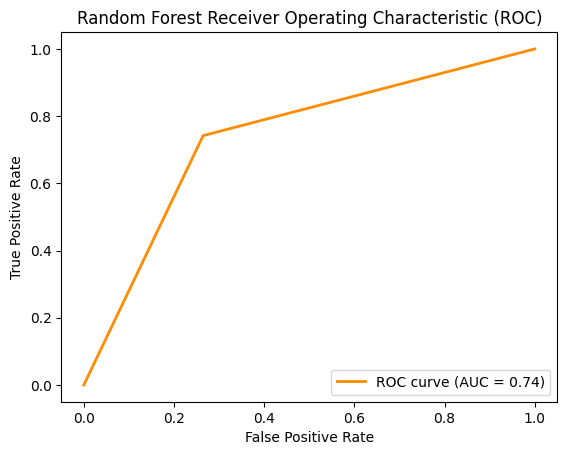

AUC value is: 0.7386760752688172


In [148]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_tuned_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

## Naive Bayes

Text(0.5, 1.0, 'Gaussian Model Confusion Matrix')

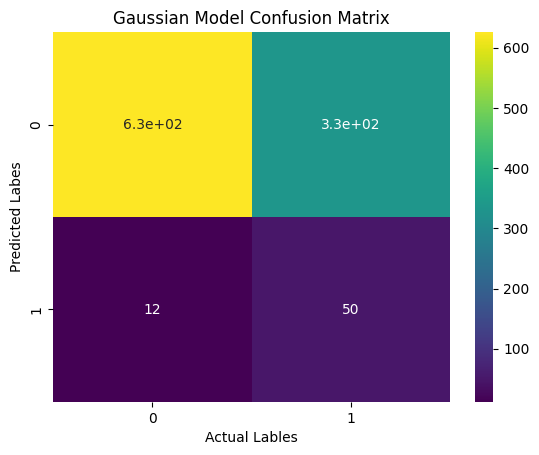

In [149]:
gaussian_model=GaussianNB()
gaussian_model.fit(scaled_x_train, y_train_resampled)
predicted1 = gaussian_model.predict(scaled_x_test)
modelPred = predicted1
sns.heatmap(confusion_matrix(y_test,predicted1),cmap='viridis',annot=True);
plt.xlabel("Actual Lables")
plt.ylabel("Predicted Labes")
plt.title("Gaussian Model Confusion Matrix")

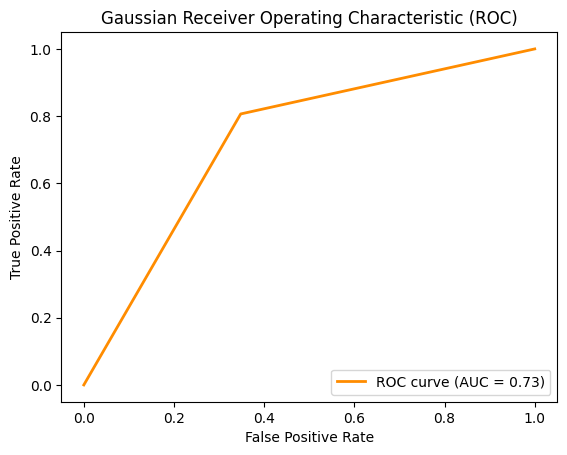

AUC value is: 0.7292674731182796


In [150]:
#false_positive_rate, true_positive_rate, threshold = roc_curve(predicted1, y_test)
fpr, tpr, thresholds = roc_curve(y_test, predicted1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

Accuracy for Bernoulli is 70.93933463796478
Confusion Matrix:
 [[676 284]
 [ 13  49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82       960
           1       0.15      0.79      0.25        62

    accuracy                           0.71      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.93      0.71      0.79      1022



Text(0.5, 1.0, 'Bernoulli Model Confusion Matrix')

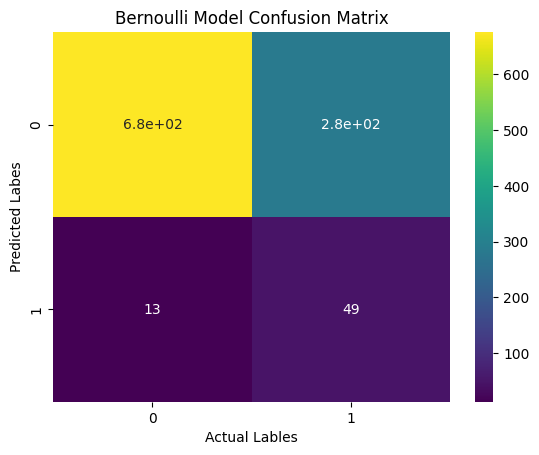

In [151]:
bernoulli_model=BernoulliNB()
bernoulli_model.fit(scaled_x_train,y_train_resampled)
predicted2=bernoulli_model.predict(scaled_x_test)
print("Accuracy for Bernoulli is",accuracy_score(y_test,predicted2)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted2))
print("\nClassification Report:\n", classification_report(y_test, predicted2))
modelPred = predicted2
sns.heatmap(confusion_matrix(y_test,modelPred),cmap='viridis',annot=True);
plt.xlabel("Actual Lables")
plt.ylabel("Predicted Labes")
plt.title("Bernoulli Model Confusion Matrix")

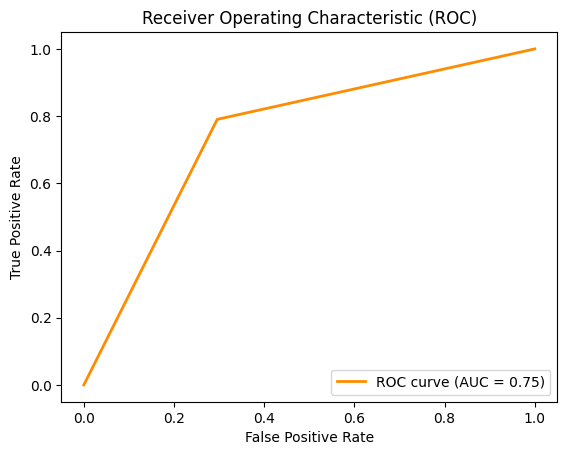

AUC value is: 0.7472446236559139


In [152]:
fpr, tpr, thresholds = roc_curve(y_test, predicted2)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

## XGBoost

In [153]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(scaled_x_train, y_train_resampled)
y_pred_boost = xgb_clf.predict(scaled_x_test)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred_boost)
print("Confusion Matrix:\n", confusion_mat)

class_report = classification_report(y_test, y_pred_boost)
print("Classification Report:\n", class_report)


Accuracy: 0.7808219178082192
Confusion Matrix:
 [[725 235]
 [ 17  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85       960
           1       0.16      0.73      0.26        62

    accuracy                           0.75      1022
   macro avg       0.57      0.74      0.56      1022
weighted avg       0.93      0.75      0.82      1022



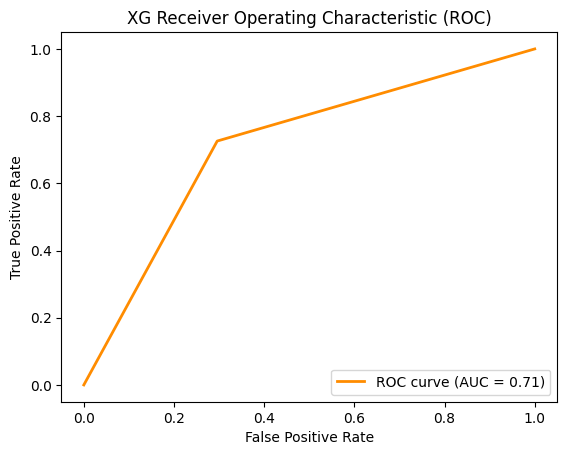

AUC value is: 0.7149865591397848


In [154]:
fafpr, tpr, thresholds = roc_curve(y_test, y_pred_boost)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

Text(0.5, 1.0, 'Gaussian Model Confusion Matrix')

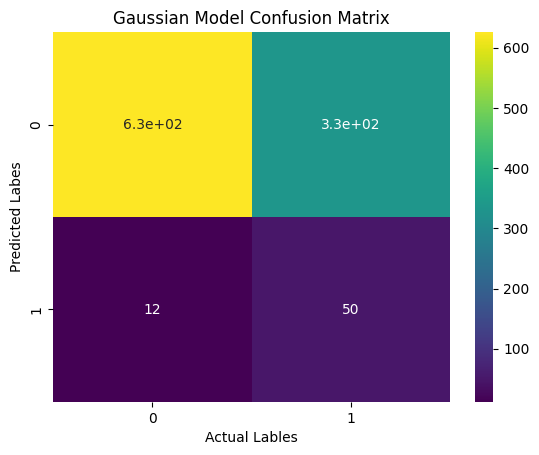

In [155]:
modelPred = y_pred_boost
sns.heatmap(confusion_matrix(y_test,predicted1),cmap='viridis',annot=True);
plt.xlabel("Actual Lables")
plt.ylabel("Predicted Labes")
plt.title("Gaussian Model Confusion Matrix")

In [156]:
## ValueError: Negative values in data passed to MultinomialNB (input X)
# multinomial_model=MultinomialNB()
# multinomial_model.fit(scaled_x_train,y_train)
# predicted3=multinomial_model.predict(scaled_x_test)
# print("Accuracy for Multinomial is",accuracy_score(y_test,predicted3)*100)
# print("Confusion Matrix:\n", confusion_matrix(y_test, predicted3))
# print("\nClassification Report:\n", classification_report(y_test, predicted3))

# sns.heatmap(confusion_matrix(y_test,predicted3),cmap='viridis',annot=True);

## Multi Layer Perceptron

# Validation Splitting

In [157]:
x_train_, x_validation, y_train_, y_validation = train_test_split(scaled_x_train, y_train, test_size=0.1, random_state=42)

In [158]:
inputShape = x_train.shape[-1]

In [159]:
inputShape

9

In [160]:
model = Sequential()
model.add(Dense(10, input_shape=(inputShape,),activation = 'leaky_relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Print a summary of the Keras model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 111 (444.00 Byte)
Trainable params: 111 (444.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [161]:
history = model.fit(x=x_train_,y=y_train_,validation_data=(x_validation,y_validation),batch_size = 64, epochs=50, verbose=1)

Epoch 1/50
105/105 [==============================] - 4s 15ms/step - loss: 0.6449 - accuracy: 0.6292 - val_loss: 0.6115 - val_accuracy: 0.6775
Epoch 2/50
105/105 [==============================] - 1s 9ms/step - loss: 0.5791 - accuracy: 0.7403 - val_loss: 0.5681 - val_accuracy: 0.7233
Epoch 3/50
105/105 [==============================] - 1s 8ms/step - loss: 0.5397 - accuracy: 0.7733 - val_loss: 0.5410 - val_accuracy: 0.7463
Epoch 4/50
105/105 [==============================] - 1s 5ms/step - loss: 0.5140 - accuracy: 0.7842 - val_loss: 0.5226 - val_accuracy: 0.7517
Epoch 5/50
105/105 [==============================] - 1s 7ms/step - loss: 0.4963 - accuracy: 0.7896 - val_loss: 0.5102 - val_accuracy: 0.7557
Epoch 6/50
105/105 [==============================] - 1s 8ms/step - loss: 0.4840 - accuracy: 0.7941 - val_loss: 0.5016 - val_accuracy: 0.7625
Epoch 7/50
105/105 [==============================] - 1s 7ms/step - loss: 0.4750 - accuracy: 0.7944 - val_loss: 0.4953 - val_accuracy: 0.7692
Epoch

In [162]:
y_pred = model.predict(scaled_x_test)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

32/32 [==============================] - 0s 3ms/step
[[747  25]
 [213  37]]
Deep Learning Accuracy Score:  0.7671232876712328
Deep Learning Precision Score:  0.148
Deep Learning Recall Score:  0.5967741935483871


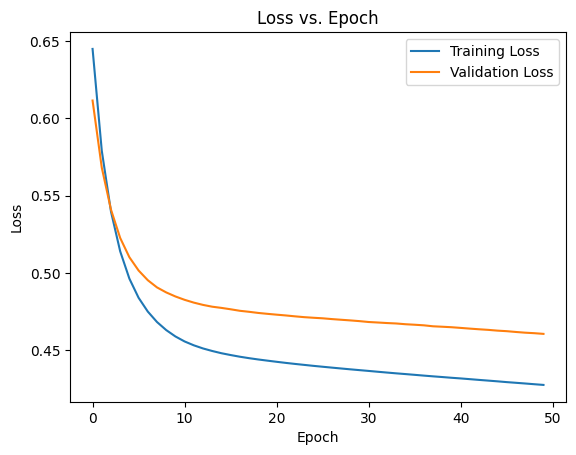

Text(0.5, 1.0, 'MLP Model Confusion Matrix')

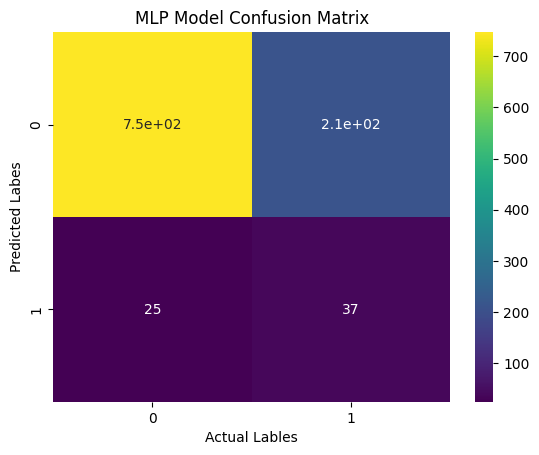

In [163]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()
modelPred = y_pred
sns.heatmap(confusion_matrix(y_test,modelPred),cmap='viridis',annot=True);
plt.xlabel("Actual Lables")
plt.ylabel("Predicted Labes")
plt.title("MLP Model Confusion Matrix")

In [164]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.86       960
           1       0.15      0.60      0.24        62

    accuracy                           0.77      1022
   macro avg       0.56      0.69      0.55      1022
weighted avg       0.92      0.77      0.82      1022



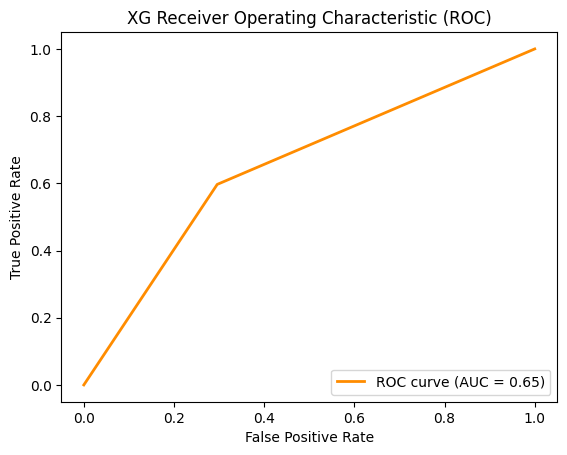

AUC value is: 0.6504704301075268


In [165]:
fafpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

### Hyper Parameter Tuning for MLP Using sequential

Model 1

## Grid search

In [166]:
!pip install scikeras

In [167]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.1,
    name="adam"
)

In [168]:
#import libraries
grid_x = x_train
grid_y = y_train

def createModel(neurons=[12,8 , 6, 1], activation=["leaky_relu","sigmoid","linear"]):
  """
  You can define any parameter in the the model constructor bellow
  e.g activation = [], kernel_initializer, optimizer, loss etc
  """
  model = keras.Sequential()
  model.add(keras.layers.Dense(neurons[0],activation=activation[0], input_shape=(inputShape,)))
  model.add(keras.layers.Dense(neurons[1],activation=activation[0], kernel_initializer='uniform'))
  model.add(keras.layers.Dense(neurons[2],activation=activation[0], kernel_initializer='uniform'))
  model.add(keras.layers.Dense(neurons[3],activation=activation[1]))
  model.compile(loss='binary_crossentropy',metrics=[keras.metrics.BinaryAccuracy()])
  return model
#define the model hyperparametrs typically passed in the model.fit() method, you can also pass parameter to the createModel funtion.
model= KerasClassifier(model=createModel, verbose=1,optimizer=opt, random_state=42)
#Define grid search, prefix with model__ to seach at the model construction level

In [169]:
param_grid1 = {"batch_size":[10,20,100],"epochs":[10,20,50]}#,"loss__gama":[0.01, 0.1,0.25,0.5], "optimizer__learning_rate":[0.01, 0.1,0.25,0.5]}
param_grid2 = {"model__neurons":[[25,10,6,1],[21,9,6,1],[20,8,6,1],[20,7,6,1],[12,7,6,1],[10,5,2,1]],"optimizer__learning_rate":[0.01, 0.1,0.25,0.5],"model__activation":[["relu","sigmoid"],["leaky_relu","sigmoid"]]}
grid = GridSearchCV(estimator=model, param_grid=param_grid2, n_jobs=-1, cv=3, scoring=["accuracy","recall"],refit="recall")
grid_result1 = grid.fit(grid_x, grid_y)
bestParams1 = grid_result1.best_params_

232/232 [==============================] - 1s 2ms/step - loss: 0.6532 - binary_accuracy: 0.6189


In [170]:
bestParams1

{'model__activation': ['relu', 'sigmoid'],
 'model__neurons': [21, 9, 6, 1],
 'optimizer__learning_rate': 0.01}

In [171]:
bestModel = createModel(bestParams1['model__neurons'])
mlpModel =  createModel()

In [172]:
history1 = bestModel.fit(x_train,y_train, epochs=50, batch_size=64, verbose=1, validation_data=(x_validation,y_validation))


Epoch 1/50
116/116 [==============================] - 2s 5ms/step - loss: 0.6496 - binary_accuracy: 0.6194 - val_loss: 0.6923 - val_binary_accuracy: 0.5466
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 0.5473 - binary_accuracy: 0.7470 - val_loss: 0.7287 - val_binary_accuracy: 0.5466
Epoch 3/50
116/116 [==============================] - 1s 5ms/step - loss: 0.4998 - binary_accuracy: 0.7490 - val_loss: 0.7677 - val_binary_accuracy: 0.5452
Epoch 4/50
116/116 [==============================] - 0s 4ms/step - loss: 0.4876 - binary_accuracy: 0.7536 - val_loss: 0.7990 - val_binary_accuracy: 0.5452
Epoch 5/50
116/116 [==============================] - 1s 8ms/step - loss: 0.4853 - binary_accuracy: 0.7551 - val_loss: 0.8220 - val_binary_accuracy: 0.5452
Epoch 6/50
116/116 [==============================] - 1s 6ms/step - loss: 0.4817 - binary_accuracy: 0.7580 - val_loss: 0.8517 - val_binary_accuracy: 0.5439
Epoch 7/50
116/116 [==============================] - 1s 8ms/ste

In [173]:
history2 = bestModel.fit(x_train,y_train, epochs=50, batch_size=64, verbose=1, validation_data=(x_validation,y_validation))


Epoch 1/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4482 - binary_accuracy: 0.7731 - val_loss: 1.4858 - val_binary_accuracy: 0.5317
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 0.4471 - binary_accuracy: 0.7723 - val_loss: 1.5300 - val_binary_accuracy: 0.5304
Epoch 3/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4472 - binary_accuracy: 0.7717 - val_loss: 1.5163 - val_binary_accuracy: 0.5304
Epoch 4/50
116/116 [==============================] - 0s 3ms/step - loss: 0.4462 - binary_accuracy: 0.7731 - val_loss: 1.5453 - val_binary_accuracy: 0.5277
Epoch 5/50
116/116 [==============================] - 0s 4ms/step - loss: 0.4460 - binary_accuracy: 0.7760 - val_loss: 1.5403 - val_binary_accuracy: 0.5290
Epoch 6/50
116/116 [==============================] - 0s 4ms/step - loss: 0.4446 - binary_accuracy: 0.7806 - val_loss: 1.5355 - val_binary_accuracy: 0.5304
Epoch 7/50
116/116 [==============================] - 0s 3ms/ste

In [174]:
mlpPred1 = bestModel.predict(scaled_x_test)
mlpPred2 = mlpModel.predict(scaled_x_test)

32/32 [==============================] - 0s 3ms/step


In [175]:
bestParams1

{'model__activation': ['relu', 'sigmoid'],
 'model__neurons': [21, 9, 6, 1],
 'optimizer__learning_rate': 0.01}

In [176]:
y_pred_real1=(mlpPred1>0.5).astype(int)
y_pred_real2=(mlpPred2>0.5).astype(int)

In [177]:
y_pred_real1

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

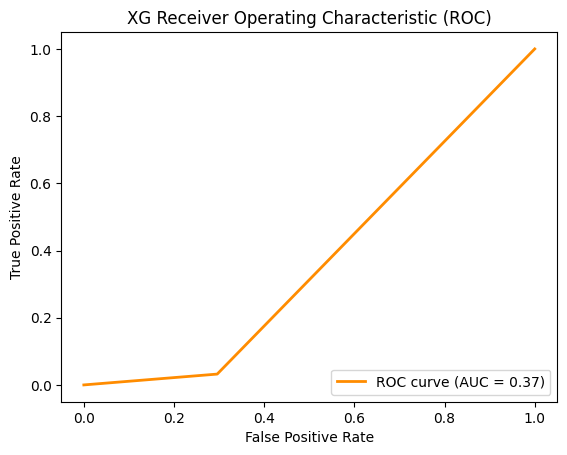

AUC value is: 0.3682123655913978


In [178]:
fafpr, tpr, thresholds = roc_curve(y_test, y_pred_real1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

Text(0.5, 1.0, 'MLP Model Confusion Matrix')

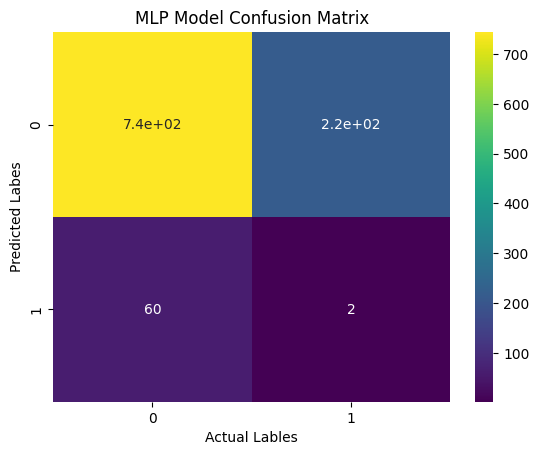

In [179]:
modelPred = y_pred_real1
sns.heatmap(confusion_matrix(y_test,modelPred),cmap='viridis',annot=True);
plt.xlabel("Actual Lables")
plt.ylabel("Predicted Labes")
plt.title("MLP Model Confusion Matrix")

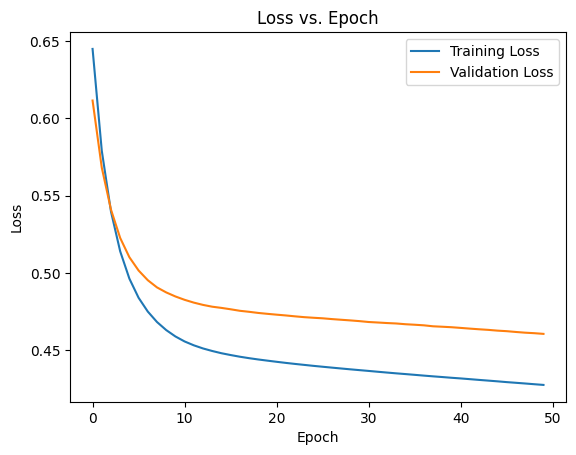

In [180]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()